In [1]:
from pnp_pipeline import SDXLDDIMPipeline
import torch

pipe = SDXLDDIMPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0",
    torch_dtype=torch.float16,
    use_safetensors=True,
    variant="fp16",
).to("cuda")

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [2]:
import PIL

init = PIL.Image.open("example.png")

x = pipe(prompt = "green horse", image = init)

100%|██████████| 50/50 [00:04<00:00, 10.08it/s]


In [3]:
from diffusers import StableDiffusionXLPipeline, DDIMScheduler
pipe = StableDiffusionXLPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0",
    torch_dtype=torch.float16,
    use_safetensors=True,
    variant="fp16",
).to("cuda")

pipe.scheduler = DDIMScheduler.from_config(pipe.scheduler.config)



Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

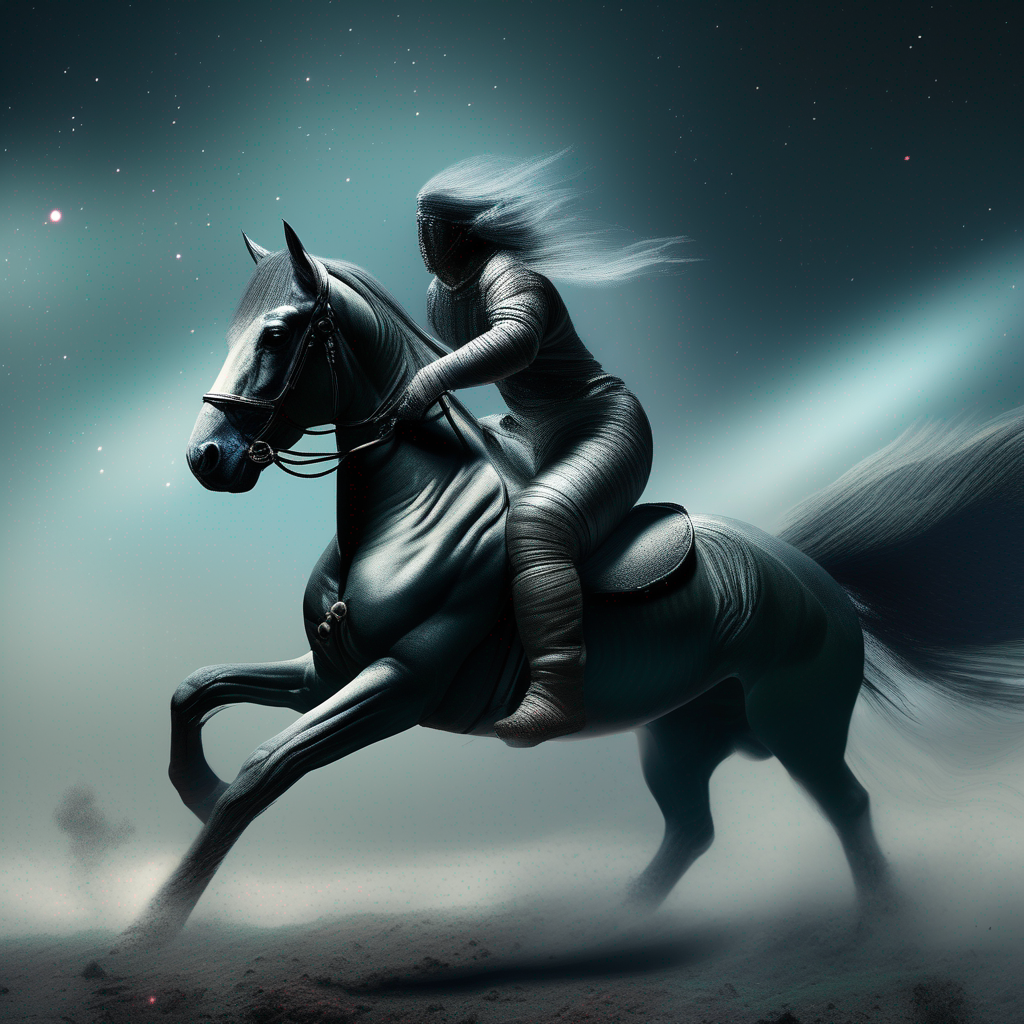

In [9]:
img = pipe(prompt = "fantasy black horse, masterpiece, 4 K", latents = x[0].clone(), guidance_scale = 3.5 ).images[0]
img

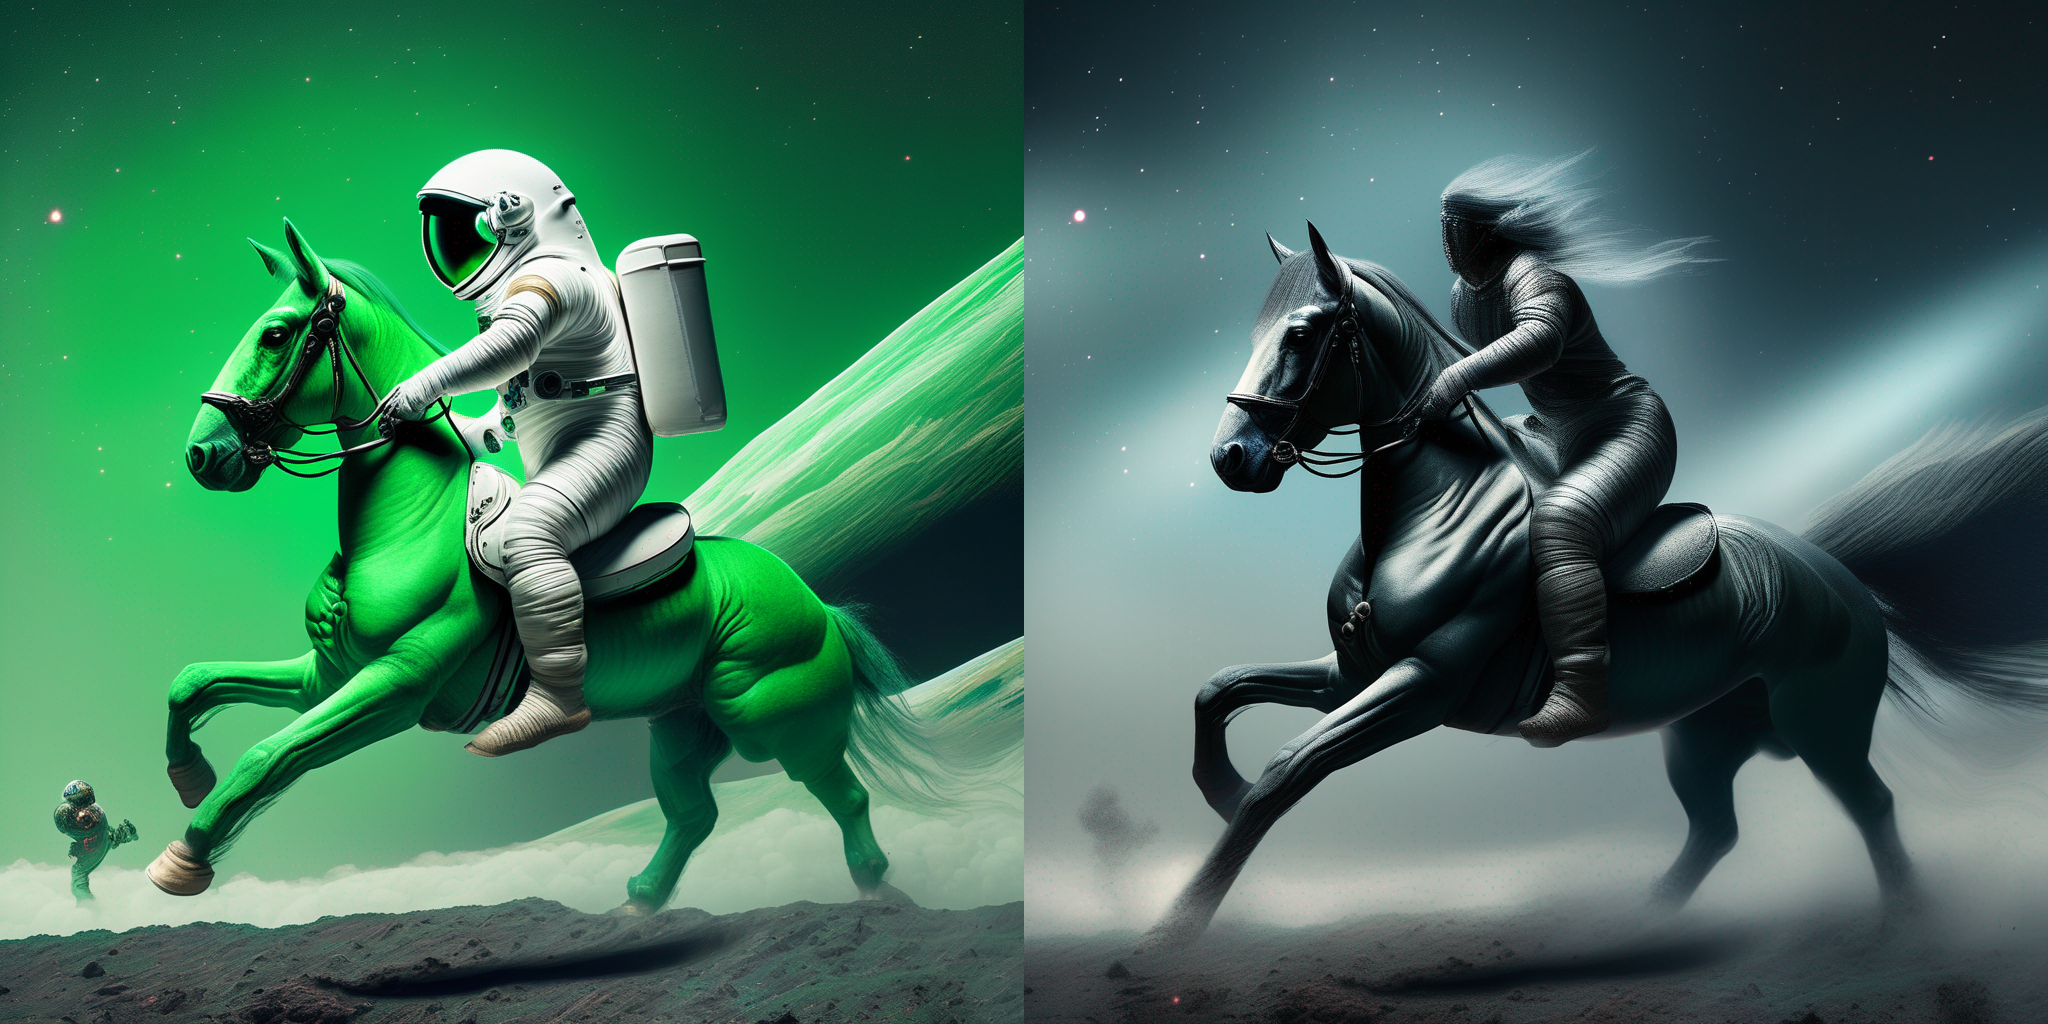

In [13]:
import PIL
from PIL import Image
import numpy as np

def image_grid(images, rows=None, columns=None):
    num_images = len(images)
    
    if rows is None and columns is None:
        rows = 1
        columns = num_images
    elif rows is None:
        rows = int(np.ceil(num_images / columns))
    elif columns is None:
        columns = int(np.ceil(num_images / rows))
    
    grid_width = columns * images[0].width
    grid_height = rows * images[0].height
    grid_image = Image.new('RGB', (grid_width, grid_height))
    
    for i, image in enumerate(images):
        row = i // columns
        col = i % columns
        x_offset = col * image.width
        y_offset = row * image.height
        grid_image.paste(image, (x_offset, y_offset))
    
    return grid_image

image_grid([PIL.Image.open("example.png"), img])
    